In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

df['target'] = diabetes.target

df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
#Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.
print("Кількість пропусків у кожному стовпці:\n", df.isnull().sum())

Кількість пропусків у кожному стовпці:
 age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [5]:
#Перевірити наявність дублікатів, при виявленні – видалити.
print(f"Кількість дублікатів у датасеті: {df.duplicated().sum()}")

Кількість дублікатів у датасеті: 0


In [6]:
#Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.
unique_values = df['sex'].unique()
print("Унікальні значення в стовпчику 'sex':\n", unique_values)

df['sex'] = df['sex'].apply(lambda x: 0 if x < 0 else 1)

print("\nЗначення в стовпці 'sex' після заміни на бінарні ознаки:\n", df['sex'].unique())

Унікальні значення в стовпчику 'sex':
 [ 0.05068012 -0.04464164]

Значення в стовпці 'sex' після заміни на бінарні ознаки:
 [1 0]


In [7]:
#Перевірити тип даних. При необхідності замінити тип даних на числовий

print("Типи даних перед конвертацією:")
print(df.dtypes)

Типи даних перед конвертацією:
age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


bmi    0.586450
s5     0.565883
bp     0.441482
s4     0.430453
s6     0.382483
s1     0.212022
age    0.187889
s2     0.174054
sex    0.043062
s3    -0.394789
Name: target, dtype: float64


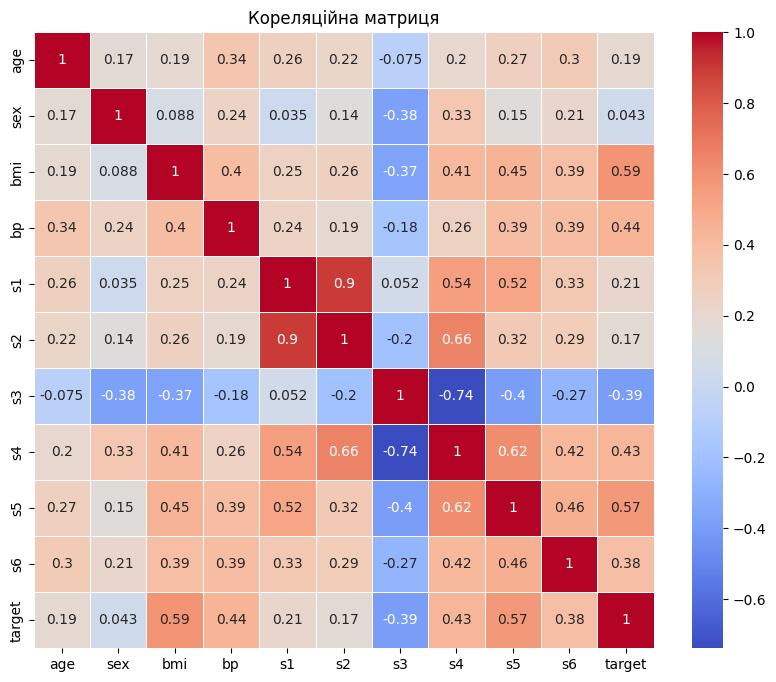

In [8]:
#Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.Побудувати теплову карту кореляції.
correlations = df.corr()['target'].drop('target').sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Кореляційна матриця')
plt.show()

In [12]:
#Масштабувати ознаки.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])
scaled_df['target'] = df['target']

scaled_df.head()




,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,135.0


In [13]:
##Поділити дані на тренувальну і тестову вибірки
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Розмір тренувальної вибірки: {X_train.shape[0]}')
print(f'Розмір тестової вибірки: {X_test.shape[0]}')

Розмір тренувальної вибірки: 353
Розмір тестової вибірки: 89


In [14]:
#Побудувати модель лінійной регресії і RandomForest регресії на
#основі більш корелюючих ознак (підібрати оптимальне число).
correlation_matrix = df.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

print("Кореляції з цільовою змінною:")
print(target_correlation)

top_features = target_correlation.index[1:6]
print(f"Вибрані ознаки: {top_features}")


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Середня квадратична помилка (Лінійна регресія): {mse_lin}")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Середня квадратична помилка (RandomForest регресія): {mse_rf}")

Кореляції з цільовою змінною:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64
Вибрані ознаки: Index(['bmi', 's5', 'bp', 's4', 's6'], dtype='object')
Середня квадратична помилка (Лінійна регресія): 2900.193628493462
Середня квадратична помилка (RandomForest регресія): 2952.0105887640448


In [16]:
#Вивести коефіцієнт детермінації і середньоквадратичну помилку.
correlation_matrix = df.corr()
target_correlation = correlation_matrix['target'].sort_values(ascending=False)

print("Кореляції з цільовою змінною:")
print(target_correlation)

top_features = target_correlation.index[1:6]
print(f"Вибрані ознаки: {top_features}")


lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)

mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f"Середня квадратична помилка (Лінійна регресія): {mse_lin}")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_pred_rf = rf_reg.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Середня квадратична помилка (RandomForest регресія): {mse_rf}")


Кореляції з цільовою змінною:
target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64
Вибрані ознаки: Index(['bmi', 's5', 'bp', 's4', 's6'], dtype='object')
Середня квадратична помилка (Лінійна регресія): 2900.193628493462
Середня квадратична помилка (RandomForest регресія): 2952.0105887640448


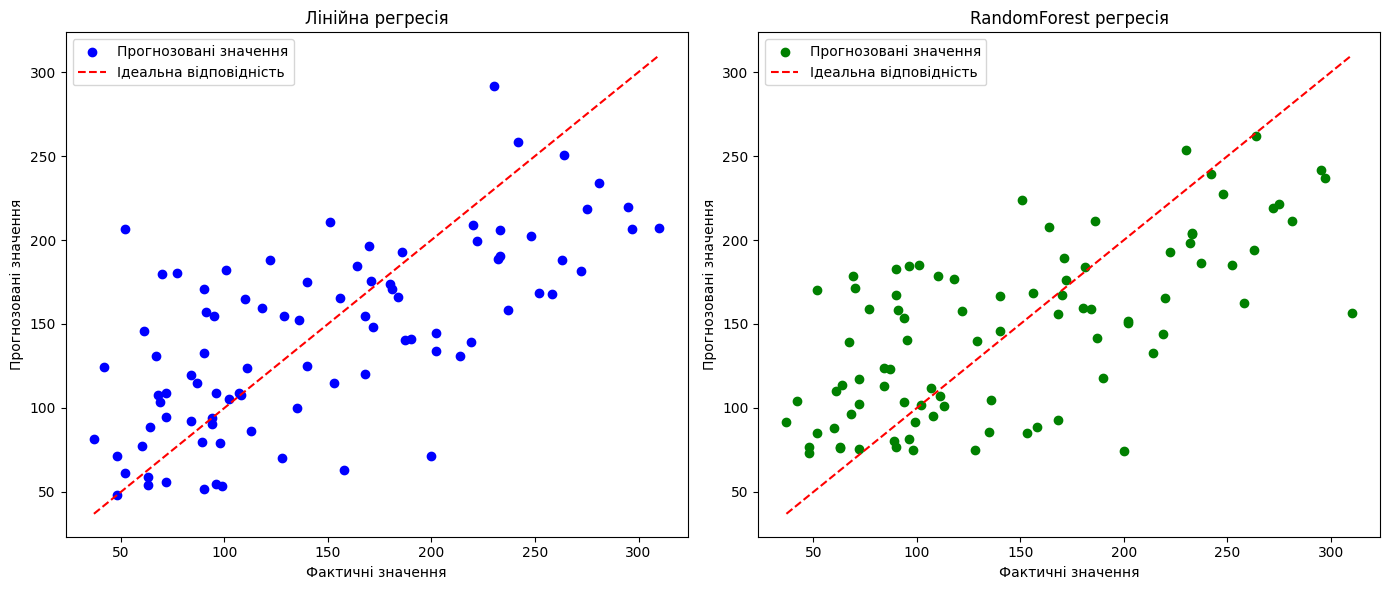

In [17]:
#Побудувати графіки.
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lin, color='blue', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ідеальна відповідність')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', label='Прогнозовані значення')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ідеальна відповідність')
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('RandomForest регресія')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
results = pd.DataFrame({
    'Фактичні значення': y_test,
    'Прогнозовані значення (Лінійна регресія)': y_pred_lin,
    'Прогнозовані значення (RandomForest регресія)': y_pred_rf
})

results.head()

,Фактичні значення,Прогнозовані значення (Лінійна регресія),Прогнозовані значення (RandomForest регресія)
287,219.0,139.547558,144.00
211,70.0,179.517208,171.58
72,202.0,134.038756,150.72
321,230.0,291.417029,253.71
73,111.0,123.789659,107.19


Висновок :
У ході аналізу датасету Diabetes було проведено очищення та підготовку даних, виявлено найбільш впливові ознаки (BMI, рівень глікемії, артеріальний тиск). Лінійна регресія показала базову точність, але модель Random Forest забезпечила кращі результати з вищим R² та нижчим MSE. Отже, Random Forest доцільніше використовувати для прогнозування прогресу діабету.